In [ ]:
# Mounting the Google Drive to get access to the file that contains the information that is required to connect to my twitter
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# SETTING KAGGLE FOLDER INSIDE MyDrive AS THE WORKING DIRECTORY TO DOWNLOAD THE DATASET
%cd /content/drive/MyDrive/IDS 561/Project
!chmod 755 -R "/content/drive/MyDrive/IDS 561/Project"

/content/drive/MyDrive/IDS 561/Project


1. GET THE BITCOIN DATA

In [ ]:
from IPython.display import clear_output

# Getting the data from yfinance (yahoo finance)
!pip install yfinance

# Setting up PySpark, the Python API for Apache Spark, for local usage
!pip install pyspark py4j

# Clearing the output of the cell
clear_output()

In [ ]:
# Raw Package
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

import datetime as dt

import matplotlib.pyplot as plt

import math
import sys
import statsmodels.api as sm

from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error

import pyspark
from pyspark.shell import spark

from pyspark.sql.functions import when
from pyspark.sql.functions import lit

from pyspark.sql.functions import isnan, when, count, col

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.4.0
      /_/

Using Python version 3.9.16 (main, Dec  7 2022 01:11:51)
Spark context Web UI available at http://1479ceeec475:4040
Spark context available as 'sc' (master = local[*], app id = local-1682306178597).
SparkSession available as 'spark'.


In [ ]:
crypto = input("Enter the name of the CryptoCurrency(Market Cap > 10B) that you want to predict: ")

Enter the name of the CryptoCurrency(Market Cap > 10B) that you want to predict: Bitcoin


METHOD - FOR DAY TRADING

In [ ]:
# Get Bitcoin data
if crypto == "Bitcoin":
  df = yf.download(tickers='BTC-USD', period = '22h', interval = '15m')

# Get Ethereum data
elif crypto == "Ethereum":
  df = yf.download(tickers='ETH-USD', period = '22h', interval = '15m')

# Get Binance data
elif crypto == "Binance Coin":
  df = yf.download(tickers='BNB-USD', period = '22h', interval = '15m')

# Get Ripple data
elif crypto == "Ripple":
  df = yf.download(tickers='XRP-USD', period = '22h', interval = '15m')

# Get Binance USD USD data
elif crypto == "Binance USD USD":
  df = yf.download(tickers='BUSD-USD', period = '22h', interval = '15m')

# Get Solana USD data
elif crypto == "Solana USD":
  df = yf.download(tickers='SOL-USD', period = '22h', interval = '15m')

# Get Polygon data
elif crypto == "Polygon USD":
  df = yf.download(tickers='MATIC-USD', period = '22h', interval = '15m')

[*********************100%***********************]  1 of 1 completed


In [ ]:
#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title = crypto + 'live share price evolution',
    yaxis_title = crypto + 'Price (kUS Dollars)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=6, label="6h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()

In [ ]:
# Get Bitcoin data
if crypto == "Bitcoin":
  start = dt.datetime(2014,9,15)
  df_new = yf.download('BTC-USD',start,interval = '15m')

# Get Ethereum data
elif crypto == "Ethereum":
  start = dt.datetime(2015,8,5)
  end = dt.datetime.now()
  df_new = yf.download('ETH-USD', start, end)

# Get Binance data
elif crypto == "Binance Coin":
  start = dt.datetime(2017,7,23)
  end = dt.datetime.now()
  df_new = yf.download('BNB-USD', start, end)

# Get Ripple data
elif crypto == "Ripple":
  start = dt.datetime(2014,9,15)
  end = dt.datetime.now()
  df_new = yf.download('XRP-USD', start, end)

# Get Binance USD USD data
elif crypto == "Binance USD USD":
  start = dt.datetime(2019,9,18)
  end = dt.datetime.now()
  df_new = yf.download('BUSD-USD', start, end)

# Get Solana USD data
elif crypto == "Solana USD":
  start = dt.datetime(2018,9,22)
  end = dt.datetime.now()
  df_new = yf.download('SOL-USD', start, end)

# Get Polygon data
else:
  start = dt.datetime(2019,4,26)
  end = dt.datetime.now()
  df_new = yf.download('MATIC-USD', start, end)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC-USD: 15m data not available for startTime=1410912000 and endTime=1682306209. The requested range must be within the last 60 days.


In [ ]:
!pip install yfinance
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.14-py3-none-any.whl size=28643 sha256=86e5c6391dec77ad67ac0922925d3da5baaae6d8c740cbc1c7a9f0e77dc5c823
  Stored in directory: /root/.cache/pip/wheels/df/33/51/592213372072da189a4ff8f471838cadcc91add5821f7b9b38
Successfully built yahoofinancials


In [ ]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [ ]:
yahoo_financials = YahooFinancials('BTC-USD')
y=yahoo_financials.get_historical_price_data("2014-9-15", "2021-05-30", "daily")

In [ ]:
df_new= pd.DataFrame(y['BTC-USD']['prices'])

In [ ]:
df_new

,date,high,low,open,close,volume,adjclose,formatted_date
0,1410912000,468.174011,452.421997,465.864014,457.334015,21056800,457.334015,2014-09-17
1,1410998400,456.859985,413.104004,456.859985,424.440002,34483200,424.440002,2014-09-18
2,1411084800,427.834991,384.532013,424.102997,394.795990,37919700,394.795990,2014-09-19
3,1411171200,423.295990,389.882996,394.673004,408.903992,36863600,408.903992,2014-09-20
4,1411257600,412.425995,393.181000,408.084991,398.821014,26580100,398.821014,2014-09-21
...,...,...,...,...,...,...,...,...
2443,1621987200,40782.078125,37905.835938,38392.625000,39294.199219,51346735160,39294.199219,2021-05-26
2444,1622073600,40379.617188,37247.902344,39316.890625,38436.968750,43210968721,38436.968750,2021-05-27
2445,1622160000,38856.968750,34779.039062,38507.082031,35697.605469,55200191952,35697.605469,2021-05-28
2446,1622246400,37234.500000,33693.929688,35684.156250,34616.066406,45231013335,34616.066406,2021-05-29


In [ ]:
def data_cleaning(df_new):

  '''
  Changing the name of the index column to Date. 
  '''

  df_new = df_new.rename_axis(None, axis = 0)
  df_new.reset_index(inplace=True)
  df_new.rename(columns = {'index':'Date'}, inplace = True)
  return df_new

df_new = data_cleaning(df_new)
df_new

,Date,date,high,low,open,close,volume,adjclose,formatted_date
0,0,1410912000,468.174011,452.421997,465.864014,457.334015,21056800,457.334015,2014-09-17
1,1,1410998400,456.859985,413.104004,456.859985,424.440002,34483200,424.440002,2014-09-18
2,2,1411084800,427.834991,384.532013,424.102997,394.795990,37919700,394.795990,2014-09-19
3,3,1411171200,423.295990,389.882996,394.673004,408.903992,36863600,408.903992,2014-09-20
4,4,1411257600,412.425995,393.181000,408.084991,398.821014,26580100,398.821014,2014-09-21
...,...,...,...,...,...,...,...,...,...
2443,2443,1621987200,40782.078125,37905.835938,38392.625000,39294.199219,51346735160,39294.199219,2021-05-26
2444,2444,1622073600,40379.617188,37247.902344,39316.890625,38436.968750,43210968721,38436.968750,2021-05-27
2445,2445,1622160000,38856.968750,34779.039062,38507.082031,35697.605469,55200191952,35697.605469,2021-05-28
2446,2446,1622246400,37234.500000,33693.929688,35684.156250,34616.066406,45231013335,34616.066406,2021-05-29


In [ ]:
df_getvalues = df_new[['close', 'adjclose']]

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_getvalues['adjclose'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.147002
p-value: 0.695969
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Here we can see that the p-value is more than 0.05 this means our null hypothesis will be rejected and we will take this series as non-stationary.

<Axes: >

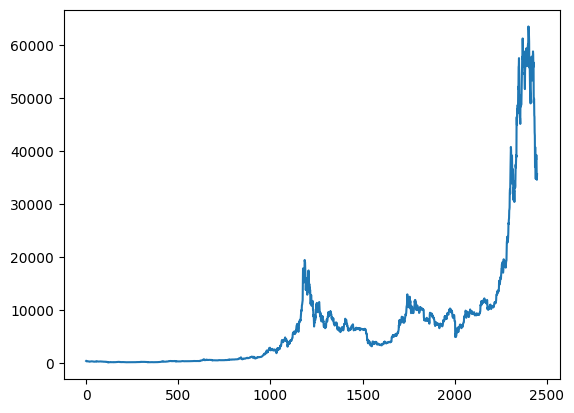

In [ ]:
df_getvalues['adjclose'].plot()

Here it is visible that the data is not stationary and requires differentiation.

Finding the value of the d parameter There is no such method that can tell us how much value of d will be optimal. However, the value of differencing can be optimal till 2 so we will try our time series in both. Pandas provide this option of differencing. Let’s utilize this.

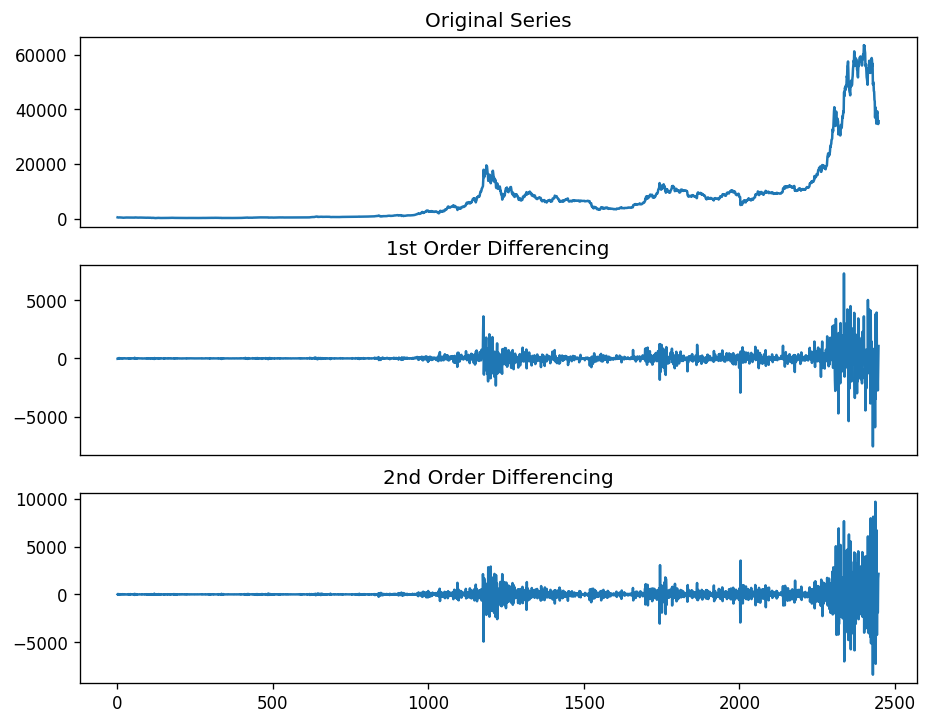

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df_getvalues['adjclose']); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df_getvalues['adjclose'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df_getvalues['adjclose'].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

Here we can see how the time series has become stationary. One thing which is noticeable here is in first-order differencing we have fewer noises in the data while after 1st order there is an increase in the noise. So we can select 1st order differencing for our model. We can also verify this using an autocorrelation plot.

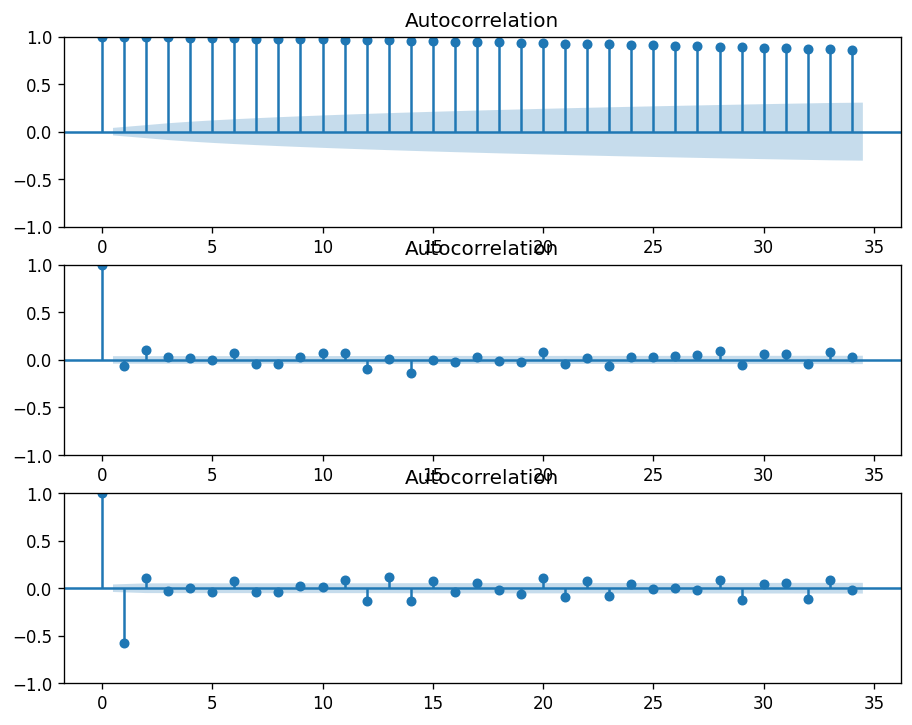

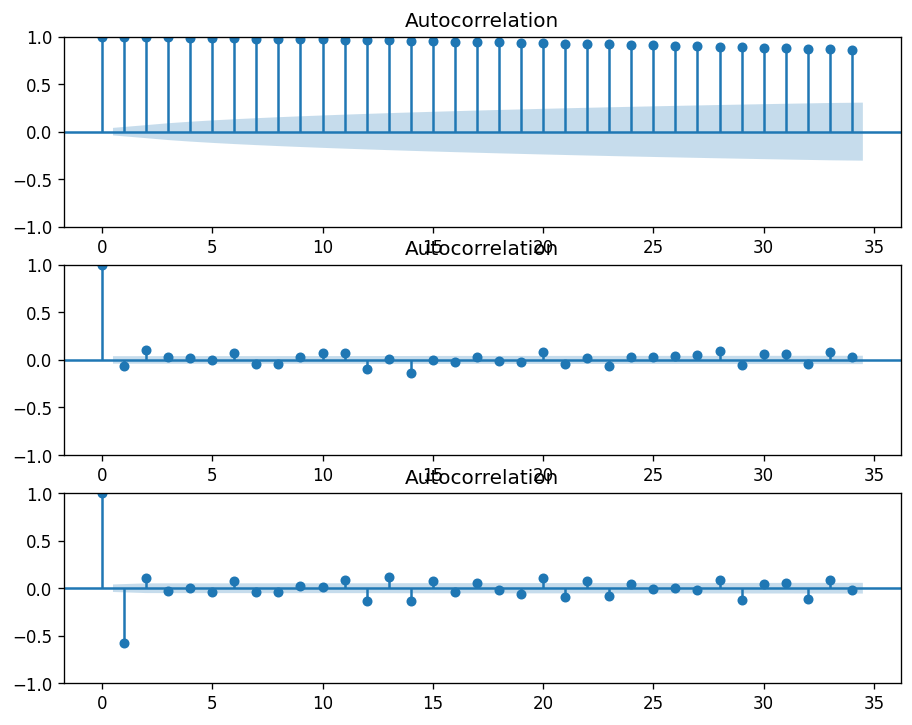

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df_getvalues['adjclose'], ax=ax1)
plot_acf(df_getvalues['adjclose'].diff().dropna(), ax=ax2)
plot_acf(df_getvalues['adjclose'].diff().diff().dropna(), ax=ax3)

In [ ]:
import statsmodels as sm

Here we can see that in second-order differencing the immediate lag has gone on the negative side, representing that in the second-order the series has become over the difference.

Finding the value of the p parameter In the above section, we have identified the optimal value of d. Now in this section, we are going to find the optimal value of p which is our number of autoregressive terms. We can find this value by inspecting the PACF plot. In one of our articles, we have explained the pacf and acf plots.

The partial autocorrelation function plot can be used to draw a correlation between the time series and its lag while the contribution from intermediate lags can be ignored. This plotting will let us know about the lags that are not required in the autoregression part.

Significant correlation in a stationary time series can be represented by adding auto regression terms. Using the PACF plot we can take the order of AR terms to be equal to the lags that can cross a significance limit.

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



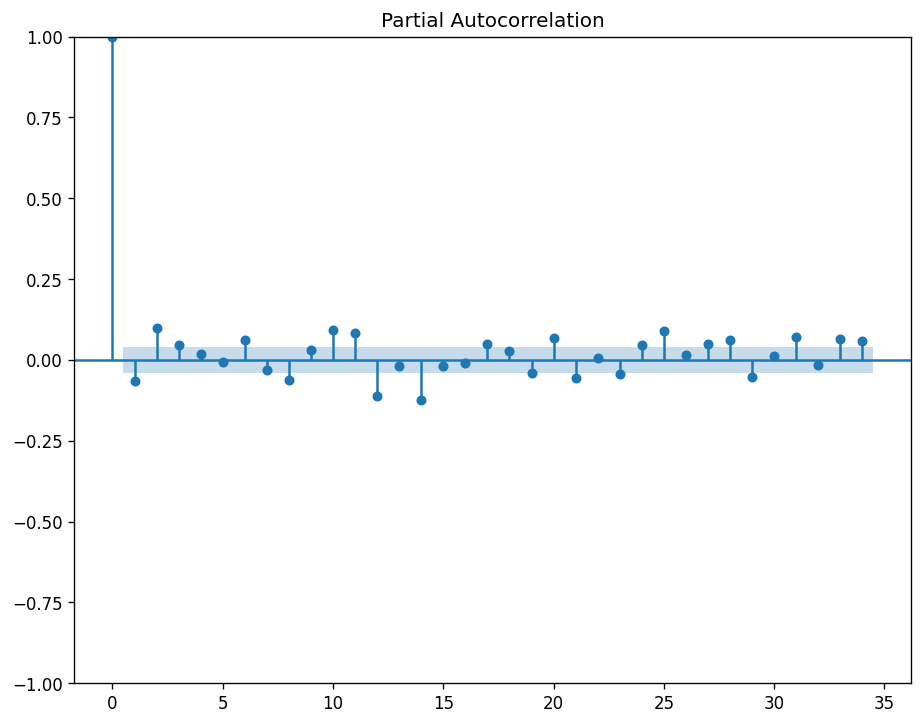

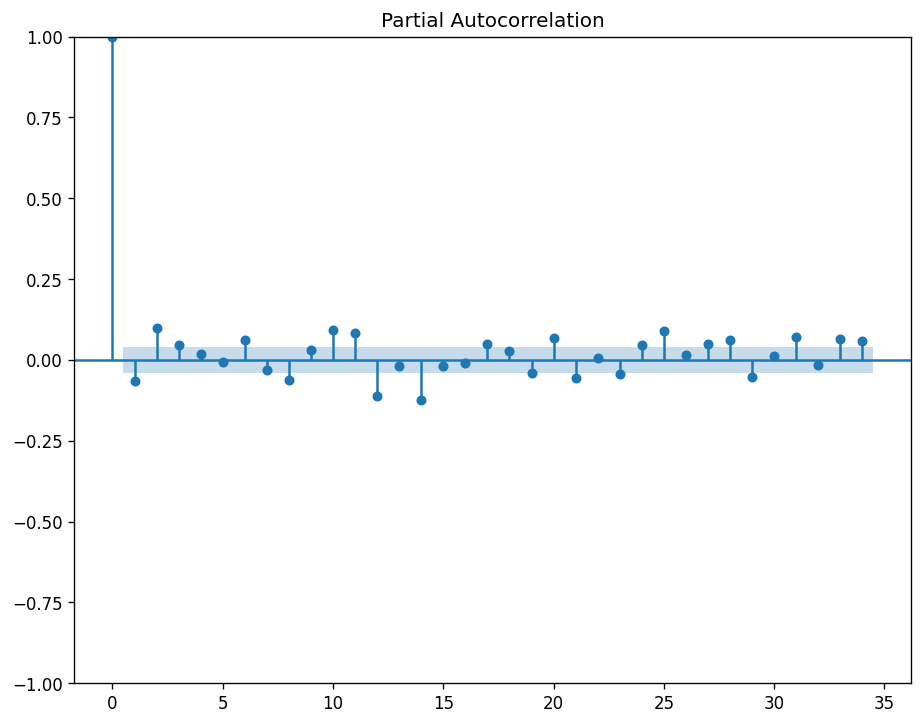

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_getvalues['adjclose'].diff().dropna())

Here we can see that the first lag is significantly out of the limit and the second one is also out of the significant limit but it is not that far so we can select the order of the p as 1.

Finding the value of the q parameter To find out the value of q we can use the ACF plot. Which will tell us how much moving average is required to remove the autocorrelation from the stationary time series.

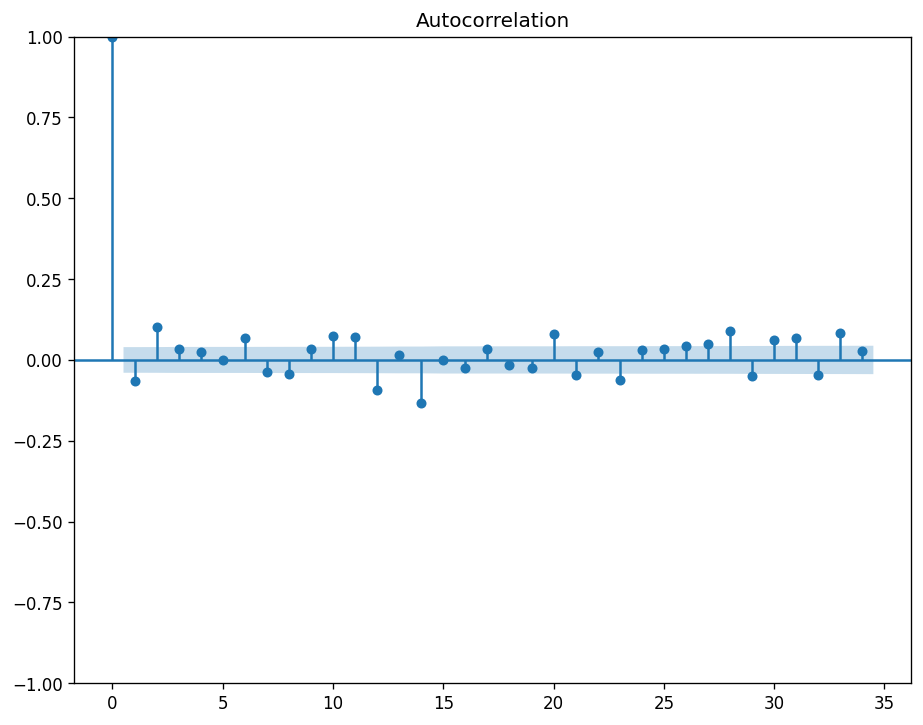

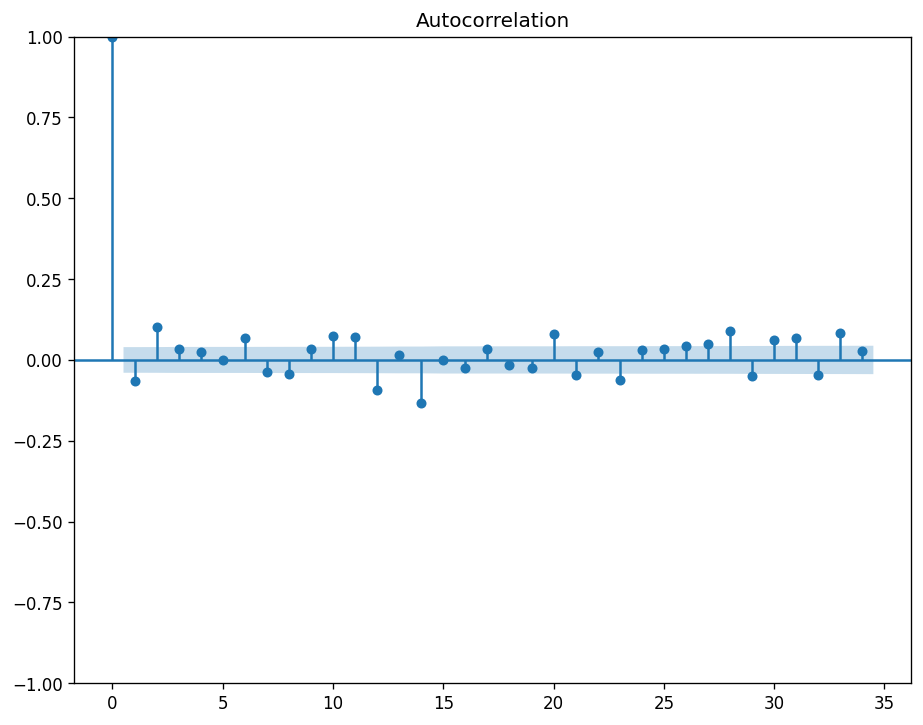

In [ ]:
plot_acf(df_getvalues["adjclose"].diff().dropna())

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_getvalues["adjclose"], order = (1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               adjclose   No. Observations:                 2448
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -19179.858
Date:                Mon, 24 Apr 2023   AIC                          38365.715
Time:                        03:20:28   BIC                          38383.123
Sample:                             0   HQIC                         38372.042
                               - 2448                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6300      0.049    -12.797      0.000      -0.727      -0.534
ma.L1          0.5568      0.054     10.388      0.000       0.452       0.662
sigma2      3.786e+05   2458.587    153.989      0.000    3.74e+05    3.83e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):            148623.29
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):            6281.49   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        41.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.graphics.tsaplots import plot_predict
model_fit.plot_predict(dynamic=False)
plt.show()

AttributeError: ignored

In [ ]:
to_row = int(len(df_new)*0.8)

training_data = (df_new[0: to_row]["adjclose"])
testing_data = (df_new[to_row:]["adjclose"])

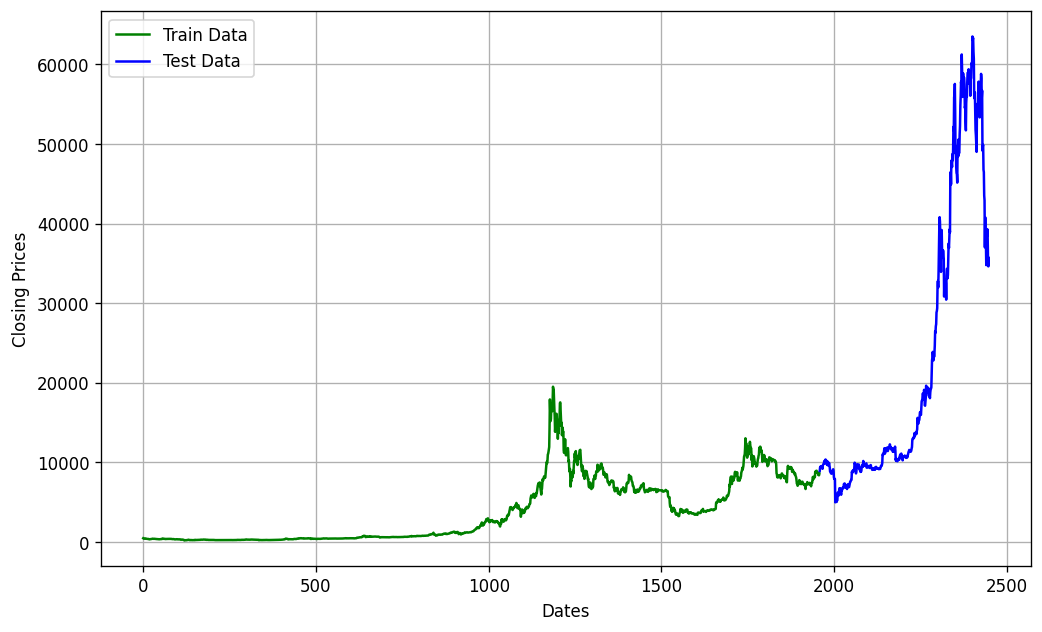

In [ ]:
plt.figure(figsize = (10, 6))
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Closing Prices")

plt.plot(training_data, "green", label = "Train Data")
plt.plot(testing_data, "blue", label = "Test Data")

plt.legend()

In [ ]:
to_row = int(len(df_new)*0.8)
training_data = list(df_new[0: to_row]["adjclose"])
testing_data = list(df_new[to_row:]["adjclose"])
model_predictions = []
n_test_obser = len(testing_data)

# Using ARIMA model - rolling model, if t=0 at the start of blue line, so as we go ahead the historical window in the ARIMA model should also be increasing

In [ ]:
for i in range(n_test_obser):
  model = ARIMA(training_data, order = (4,1,0))
  model_fit = model.fit()
  output = model.fit().forecast()
  yhat = list(output[0])[0] #y-hat, compare with y to get the accuracy of the model

  model_predictions.append(yhat)
  actual_test_value = testing_data[i]

  # Updating the value to 
  training_data.append(actual_test_value)

TypeError: ignored

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1958
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -13786.497
Date:                Mon, 24 Apr 2023   AIC                          27582.993
Time:                        03:28:46   BIC                          27610.889
Sample:                             0   HQIC                         27593.247
                               - 1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0413      0.007      5.951      0.000       0.028       0.055
ar.L2         -0.0310      0.008     -3.815      0.000      -0.047      -0.015
ar.L3          0.0089      0.009      1.010      0.3

In [ ]:
plt.figure(figsize = (15, 9))
plt.grid(True)

date_range = df_new[to_row:].Date

plt.plot(date_range, model_predictions, color = "blue", marker = "o", linestyle = "dashed", label = crypto + "Predicted Price")
plt.plot(date_range, testing_data, color = "red", label = crypto + "Actual Price")

In [ ]:
# Report Performance
mape = np.mean(np.abs(np.array(model_predictions)- np.array(testing_data))/np.abs(testing_data))

print("MAPE: " +str(mape)) # Mean Absolute Percentage Error

## **Implies the model is about 97.35% accurate in predicting the test set observation.**

## DEMO

In [ ]:
df_=df_new.copy()

In [ ]:
df_new

,Date,date,high,low,open,close,volume,adjclose,formatted_date
0,0,1410912000,468.174011,452.421997,465.864014,457.334015,21056800,457.334015,2014-09-17
1,1,1410998400,456.859985,413.104004,456.859985,424.440002,34483200,424.440002,2014-09-18
2,2,1411084800,427.834991,384.532013,424.102997,394.795990,37919700,394.795990,2014-09-19
3,3,1411171200,423.295990,389.882996,394.673004,408.903992,36863600,408.903992,2014-09-20
4,4,1411257600,412.425995,393.181000,408.084991,398.821014,26580100,398.821014,2014-09-21
...,...,...,...,...,...,...,...,...,...
2443,2443,1621987200,40782.078125,37905.835938,38392.625000,39294.199219,51346735160,39294.199219,2021-05-26
2444,2444,1622073600,40379.617188,37247.902344,39316.890625,38436.968750,43210968721,38436.968750,2021-05-27
2445,2445,1622160000,38856.968750,34779.039062,38507.082031,35697.605469,55200191952,35697.605469,2021-05-28
2446,2446,1622246400,37234.500000,33693.929688,35684.156250,34616.066406,45231013335,34616.066406,2021-05-29


In [ ]:
df_new=df_new[["formatted_date","adjclose"]]

In [ ]:
df_new.isna().count()

formatted_date    2448
adjclose          2448
dtype: int64

In [ ]:
df_new.shape

(2448, 2)

In [ ]:
df_

,Date,date,high,low,open,close,volume,adjclose,formatted_date
0,0,1410912000,468.174011,452.421997,465.864014,457.334015,21056800,457.334015,2014-09-17
1,1,1410998400,456.859985,413.104004,456.859985,424.440002,34483200,424.440002,2014-09-18
2,2,1411084800,427.834991,384.532013,424.102997,394.795990,37919700,394.795990,2014-09-19
3,3,1411171200,423.295990,389.882996,394.673004,408.903992,36863600,408.903992,2014-09-20
4,4,1411257600,412.425995,393.181000,408.084991,398.821014,26580100,398.821014,2014-09-21
...,...,...,...,...,...,...,...,...,...
2443,2443,1621987200,40782.078125,37905.835938,38392.625000,39294.199219,51346735160,39294.199219,2021-05-26
2444,2444,1622073600,40379.617188,37247.902344,39316.890625,38436.968750,43210968721,38436.968750,2021-05-27
2445,2445,1622160000,38856.968750,34779.039062,38507.082031,35697.605469,55200191952,35697.605469,2021-05-28
2446,2446,1622246400,37234.500000,33693.929688,35684.156250,34616.066406,45231013335,34616.066406,2021-05-29


In [ ]:
df_new.set_index('formatted_date',inplace=True)

In [ ]:
df_new

,adjclose
formatted_date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2021-05-26,39294.199219
2021-05-27,38436.968750
2021-05-28,35697.605469


<Axes: xlabel='formatted_date'>

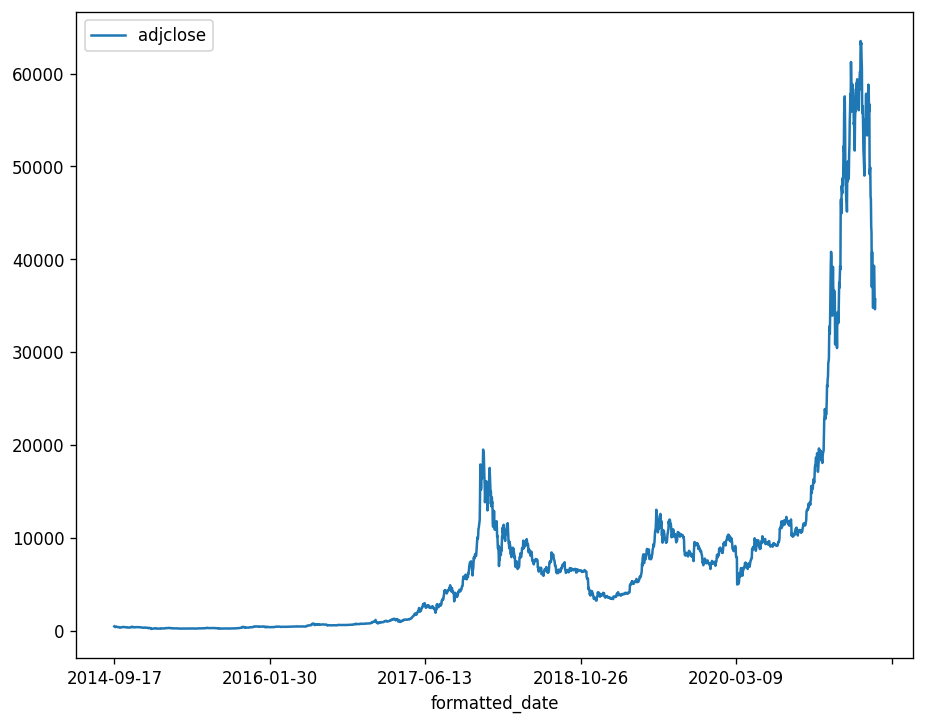

In [ ]:
df_new.plot()

Testing For Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df_new['adjclose'])

# Ho: It is non stationary
# H1: It is stationary

In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df_new['adjclose'])

ADF Test Statistic : -1.1470018280287209
p-value : 0.6959690335083504
#Lags Used : 27
Number of Observations Used : 2420
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Differencing

In [ ]:
df_new['Adj Close First Difference'] = df_new['adjclose']- df_new['adjclose'].shift(1)

<ipython-input-47-55e4dab58636>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_new

,adjclose,Adj Close First Difference
formatted_date,,
2014-09-17,457.334015,NaN
2014-09-18,424.440002,-32.894012
2014-09-19,394.795990,-29.644012
2014-09-20,408.903992,14.108002
2014-09-21,398.821014,-10.082977
...,...,...
2021-05-26,39294.199219,891.976562
2021-05-27,38436.968750,-857.230469
2021-05-28,35697.605469,-2739.363281


In [ ]:
df_new['Seasonal First Difference']=df_new['adjclose']-df_new['adjclose'].shift(30)

<ipython-input-49-28013281ab57>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_new.head(34)

,adjclose,Adj Close First Difference,Seasonal First Difference
formatted_date,,,
2014-09-17,457.334015,NaN,NaN
2014-09-18,424.440002,-32.894012,NaN
2014-09-19,394.795990,-29.644012,NaN
2014-09-20,408.903992,14.108002,NaN
2014-09-21,398.821014,-10.082977,NaN
2014-09-22,402.152008,3.330994,NaN
2014-09-23,435.790985,33.638977,NaN
2014-09-24,423.204987,-12.585999,NaN
2014-09-25,411.574005,-11.630981,NaN


In [ ]:
adfuller_test(df_new['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.8815329054073526
p-value : 0.0021750374324530034
#Lags Used : 23
Number of Observations Used : 2394
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='formatted_date'>

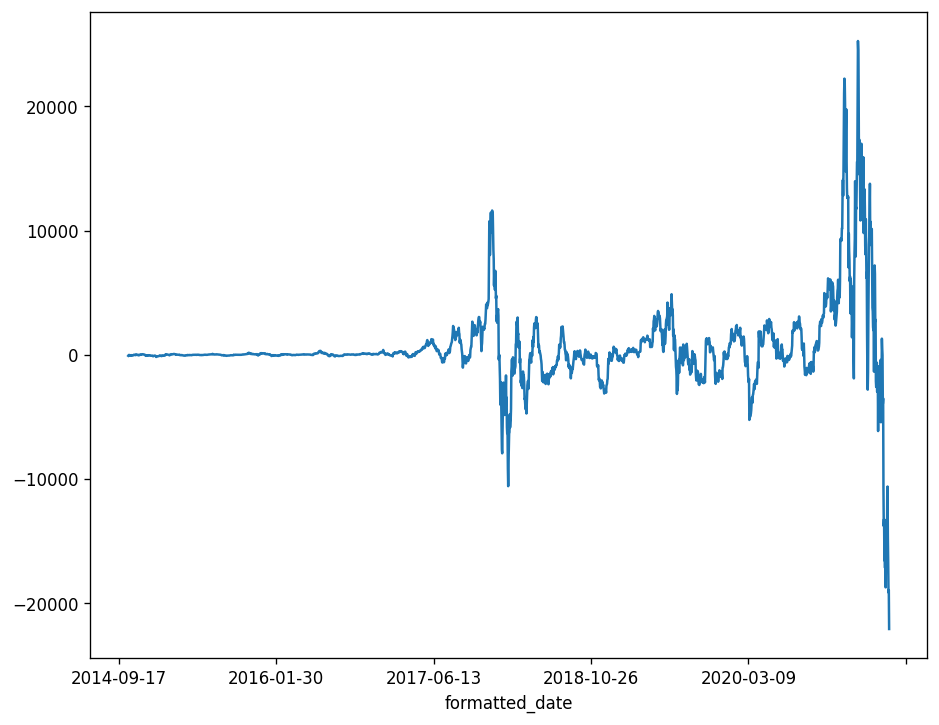

In [ ]:
df_new['Seasonal First Difference'].plot()

## **Auto Regressive Model**

In [ ]:
# from pandas.tools.plotting import autocorrelation_plot

# autocorrelation_plot(df_new['adjclose'])
# plt.show()

### **Final Thoughts on Autocorrelation and Partial Autocorrelation** 


> Identification of an AR model is often best done with the PACF.

*   For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.


> Identification of an MA model is often best done with the ACF rather than the PACF.

*  For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
p,d,q p AR model lags d differencing q MA lags

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
!pip install --upgrade --no-deps statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import statsmodels.api
# sm.__version__

# import statsmodels.api as sm

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



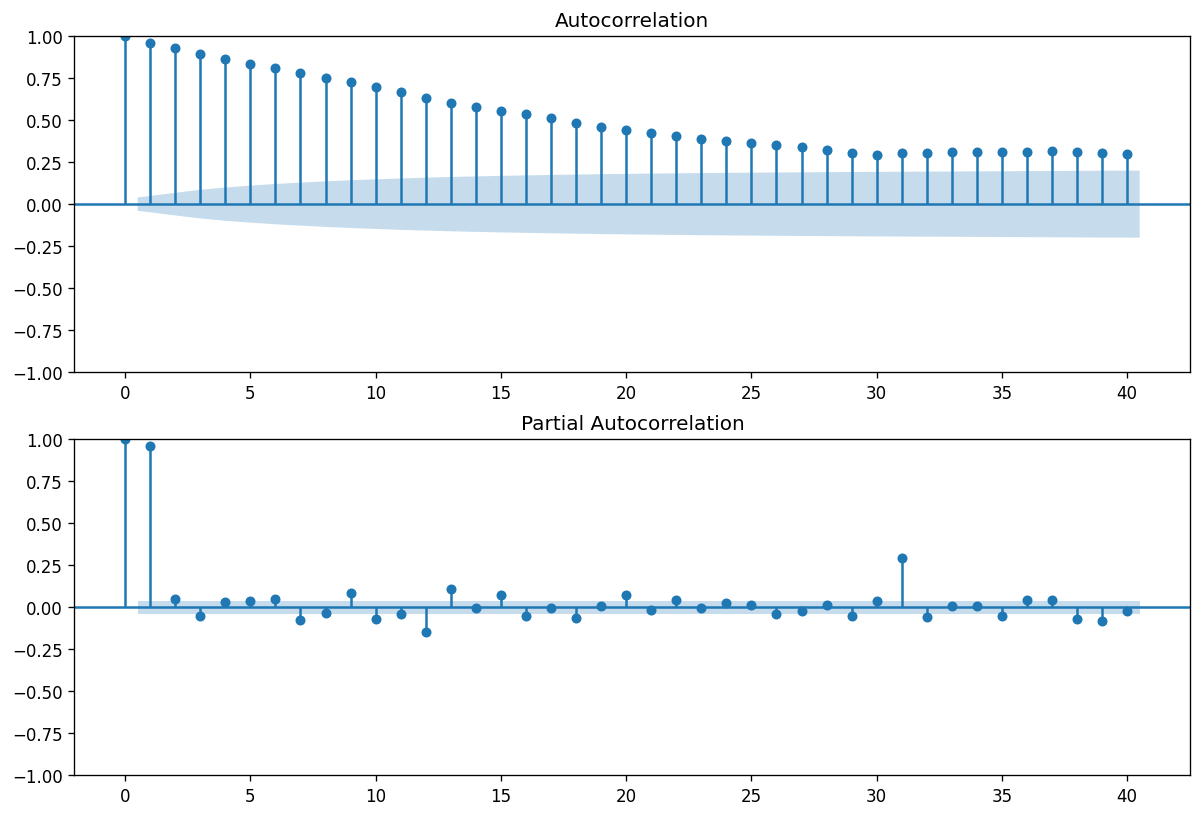

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_new['Seasonal First Difference'].iloc[31:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_new['Seasonal First Difference'].iloc[31:],lags=40,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
import statsmodels.api as sm

In [ ]:
model = ARIMA(df_new['adjclose'],order=(1,1,1))
model_fit=model.fit()

NotImplementedError: ignored

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1958
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -13786.497
Date:                Mon, 24 Apr 2023   AIC                          27582.993
Time:                        03:42:44   BIC                          27610.889
Sample:                             0   HQIC                         27593.247
                               - 1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0413      0.007      5.951      0.000       0.028       0.055
ar.L2         -0.0310      0.008     -3.815      0.000      -0.047      -0.015
ar.L3          0.0089      0.009      1.010      0.313      -0.008       0.026
ar.L4         -0.0508      0.007     -6.785      0.000      -0.065      -0.036
sigma2      7.715e+04    688.358    112.085      0.000    7.58e+04    7.85e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             70855.52
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):             503.29   Skew:                             0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df_new.shape

(2448, 3)

In [ ]:
# df_new.set_index('formatted_date',inplace=False)

In [ ]:
df_new.tail()

,adjclose,Adj Close First Difference,Seasonal First Difference
formatted_date,,,
2021-05-26,39294.199219,891.976562,-14727.554688
2021-05-27,38436.968750,-857.230469,-16596.148438
2021-05-28,35697.605469,-2739.363281,-19127.097656
2021-05-29,34616.066406,-1081.539062,-18939.042969
2021-05-30,35678.128906,1062.062500,-22072.046875


In [ ]:
df_new.index=pd.to_datetime(df_new.index)

In [ ]:
df_new.reset_index(inplace=True)

In [ ]:
df_new.dtypes

formatted_date                datetime64[ns]
adjclose                             float64
Adj Close First Difference           float64
Seasonal First Difference            float64
dtype: object

In [ ]:
df_new['forecast']=model_fit.predict(start=1800,end=2448)
df_new[['adjclose','forecast']].plot(figsize=(8,5))

ValueError: ignored

In [ ]:
!pip3 install numpy scipy patsy pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys

In [ ]:
import statsmodels.api as sm

In [ ]:
df_new_1

NameError: ignored

### Fitting SARIMA models
Fitting SARIMA models is the beginning of the end of this journey into time series modeling.

It is important that you get to know your way around the SARIMA model orders and so that's what you will focus on here.

In this exercise, you will practice fitting different SARIMA models to a set of time series.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df_new, order=(1, 1, 1), seasonal_order=(1, 1, 1, 31))
results = model.fit()
results.summary()

ValueError: ignored

In [ ]:
# model = SARIMAX(df_new, order=(1, 0, 0), seasonal_order=(1, 1, 0, 7))

In [ ]:
model=sm.tsa.statespace.SARIMAX(df_new['adjclose'],order=(1, 0, 0),seasonal_order=(1, 1, 0, 7), trend='n', enforce_stationarity=False)
results=model.fit()

In [ ]:
print(results)

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



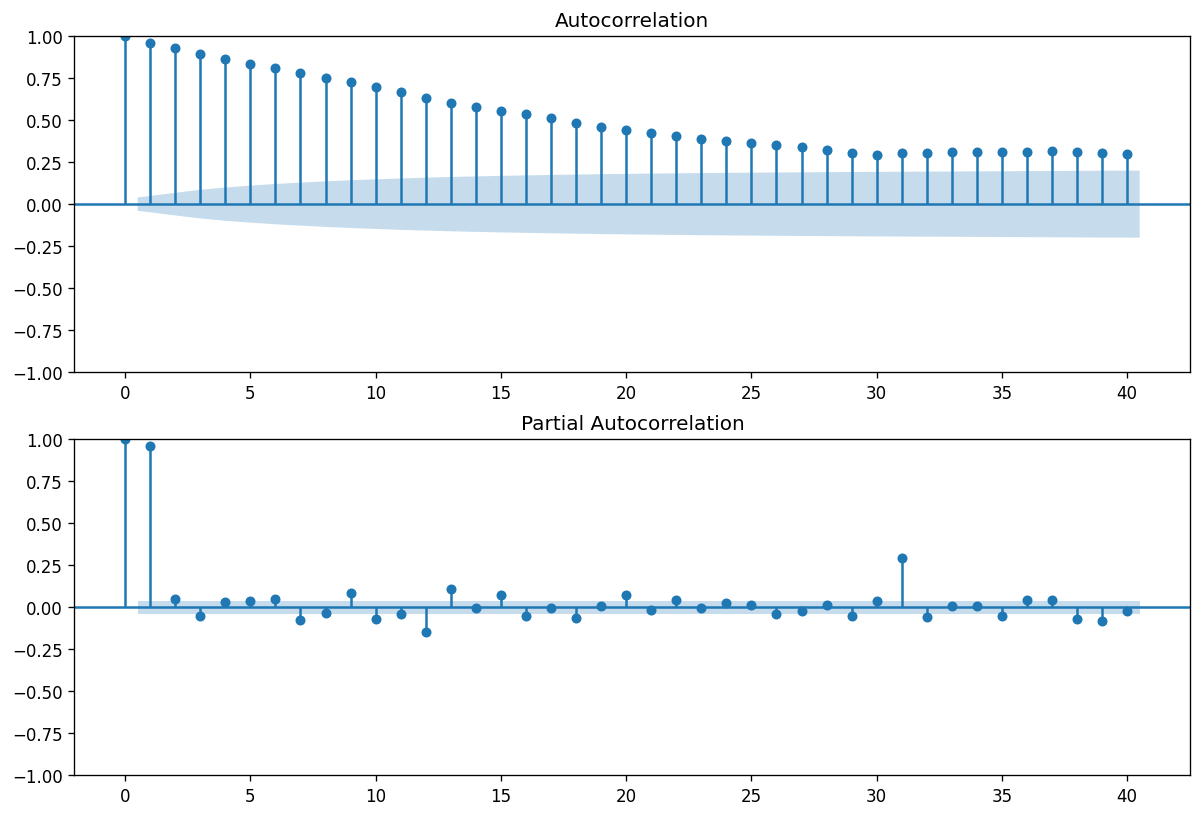

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_new['Seasonal First Difference'].iloc[31:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_new['Seasonal First Difference'].iloc[31:],lags=40,ax=ax2)

<ipython-input-84-2f65c0d58de5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

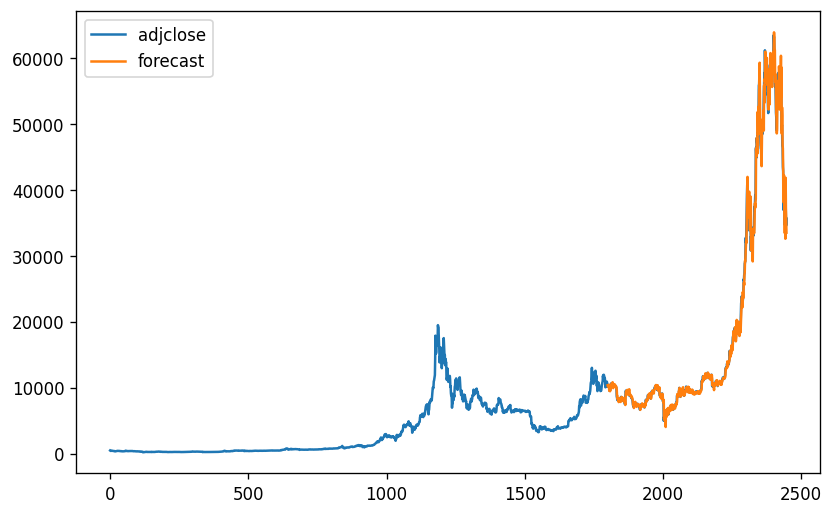

In [ ]:
df_new['forecast']=results.predict(start=1800,end=2500)
df_new[['adjclose','forecast']].plot(figsize=(8,5))

In [ ]:
df_new.tail(50)

,formatted_date,adjclose,Adj Close First Difference,Seasonal First Difference,forecast
2398,2021-04-11,60204.964844,411.730469,2872.875000,60178.434097
2399,2021-04-12,59893.453125,-311.511719,-1349.632812,60965.475294
2400,2021-04-13,63503.457031,3610.003906,4201.140625,59834.590676
2401,2021-04-14,63109.695312,-393.761719,7202.496094,61931.218970
2402,2021-04-15,63314.011719,204.316406,6509.109375,63970.024256
2403,2021-04-16,61572.789062,-1741.222656,2701.894531,63028.167966
2404,2021-04-17,60683.820312,-888.968750,2824.898438,61385.771585
2405,2021-04-18,56216.183594,-4467.636719,-2130.468750,61280.780926
2406,2021-04-19,55724.265625,-491.917969,-2589.378906,56449.851011
2407,2021-04-20,56473.031250,748.765625,-1050.390625,57610.462177


In [ ]:
df_new_1.to_frame()

In [ ]:
bitcoin=df_new.copy()

<Axes: >

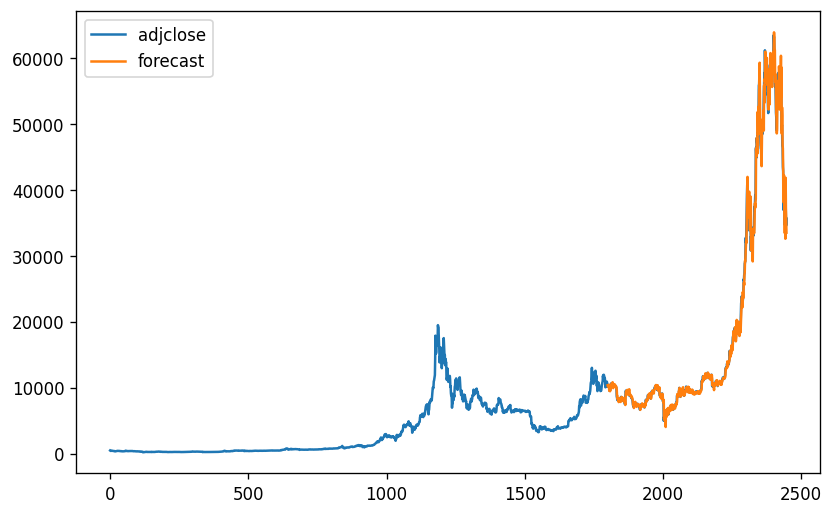

In [ ]:
bitcoin['forecast']=results.predict(start=1800,end=2500)
bitcoin[['adjclose','forecast']].plot(figsize=(8,5))

In [ ]:
bitcoin=bitcoin.iloc[:-1]

In [ ]:
bitcoin.tail(10)

,formatted_date,adjclose,Adj Close First Difference,Seasonal First Difference,forecast
2437,2021-05-20,40782.738281,3780.296875,-15690.292969,38125.514519
2438,2021-05-21,37304.691406,-3478.046875,-16601.398438,42270.496268
2439,2021-05-22,37536.632812,231.941406,-14225.640625,37539.988427
2440,2021-05-23,34770.582031,-2766.050781,-16323.070312,38293.125200
2441,2021-05-24,38705.980469,3935.398438,-11344.886719,33469.774228
2442,2021-05-25,38402.222656,-303.757812,-10602.031250,39584.052428
2443,2021-05-26,39294.199219,891.976562,-14727.554688,32614.707614
2444,2021-05-27,38436.968750,-857.230469,-16596.148438,41875.997807
2445,2021-05-28,35697.605469,-2739.363281,-19127.097656,37124.882529
2446,2021-05-29,34616.066406,-1081.539062,-18939.042969,34998.061816


In [ ]:
df_new

,formatted_date,adjclose,Adj Close First Difference,Seasonal First Difference,forecast
0,2014-09-17,457.334015,NaN,NaN,NaN
1,2014-09-18,424.440002,-32.894012,NaN,NaN
2,2014-09-19,394.795990,-29.644012,NaN,NaN
3,2014-09-20,408.903992,14.108002,NaN,NaN
4,2014-09-21,398.821014,-10.082977,NaN,NaN
...,...,...,...,...,...
2443,2021-05-26,39294.199219,891.976562,-14727.554688,32614.707614
2444,2021-05-27,38436.968750,-857.230469,-16596.148438,41875.997807
2445,2021-05-28,35697.605469,-2739.363281,-19127.097656,37124.882529
2446,2021-05-29,34616.066406,-1081.539062,-18939.042969,34998.061816


In [ ]:
df_new.set_index('formatted_date',inplace=True)

In [ ]:
df_new=df_new['adjclose']

In [ ]:
df_new.to_frame()

,adjclose
formatted_date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2021-05-26,39294.199219
2021-05-27,38436.968750
2021-05-28,35697.605469


In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_new.index[-1] + DateOffset(months=x)for x in range(0,13)]

In [ ]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=["prediction"])
future_dates_df.reset_index(inplace=True)
future_dates_df.rename({'index': 'Date'}, axis=1, inplace=True)

In [ ]:
future_dates_df['Date']

0    2021-06-30
1    2021-07-30
2    2021-08-30
3    2021-09-30
4    2021-10-30
5    2021-11-30
6    2021-12-30
7    2022-01-30
8    2022-02-28
9    2022-03-30
10   2022-04-30
11   2022-05-30
Name: Date, dtype: datetime64[ns]

In [ ]:
predict=pd.DataFrame(index=results.predict(start=1,end=13))
predict.reset_index(inplace=True)
predict['Date']=future_dates_df['Date']
predict.set_index('Date',inplace=True)
predict.rename({'predicted_mean': 'Prediction'}, axis=1, inplace=True)

In [ ]:
predict

,Prediction
Date,
2021-06-30,210.262304
2021-07-30,325.024167
2021-08-30,342.721648
2021-09-30,356.815106
2021-10-30,354.553297
2021-11-30,355.996512
2021-12-30,714.591582
2022-01-30,342.286593
2022-02-28,358.395081


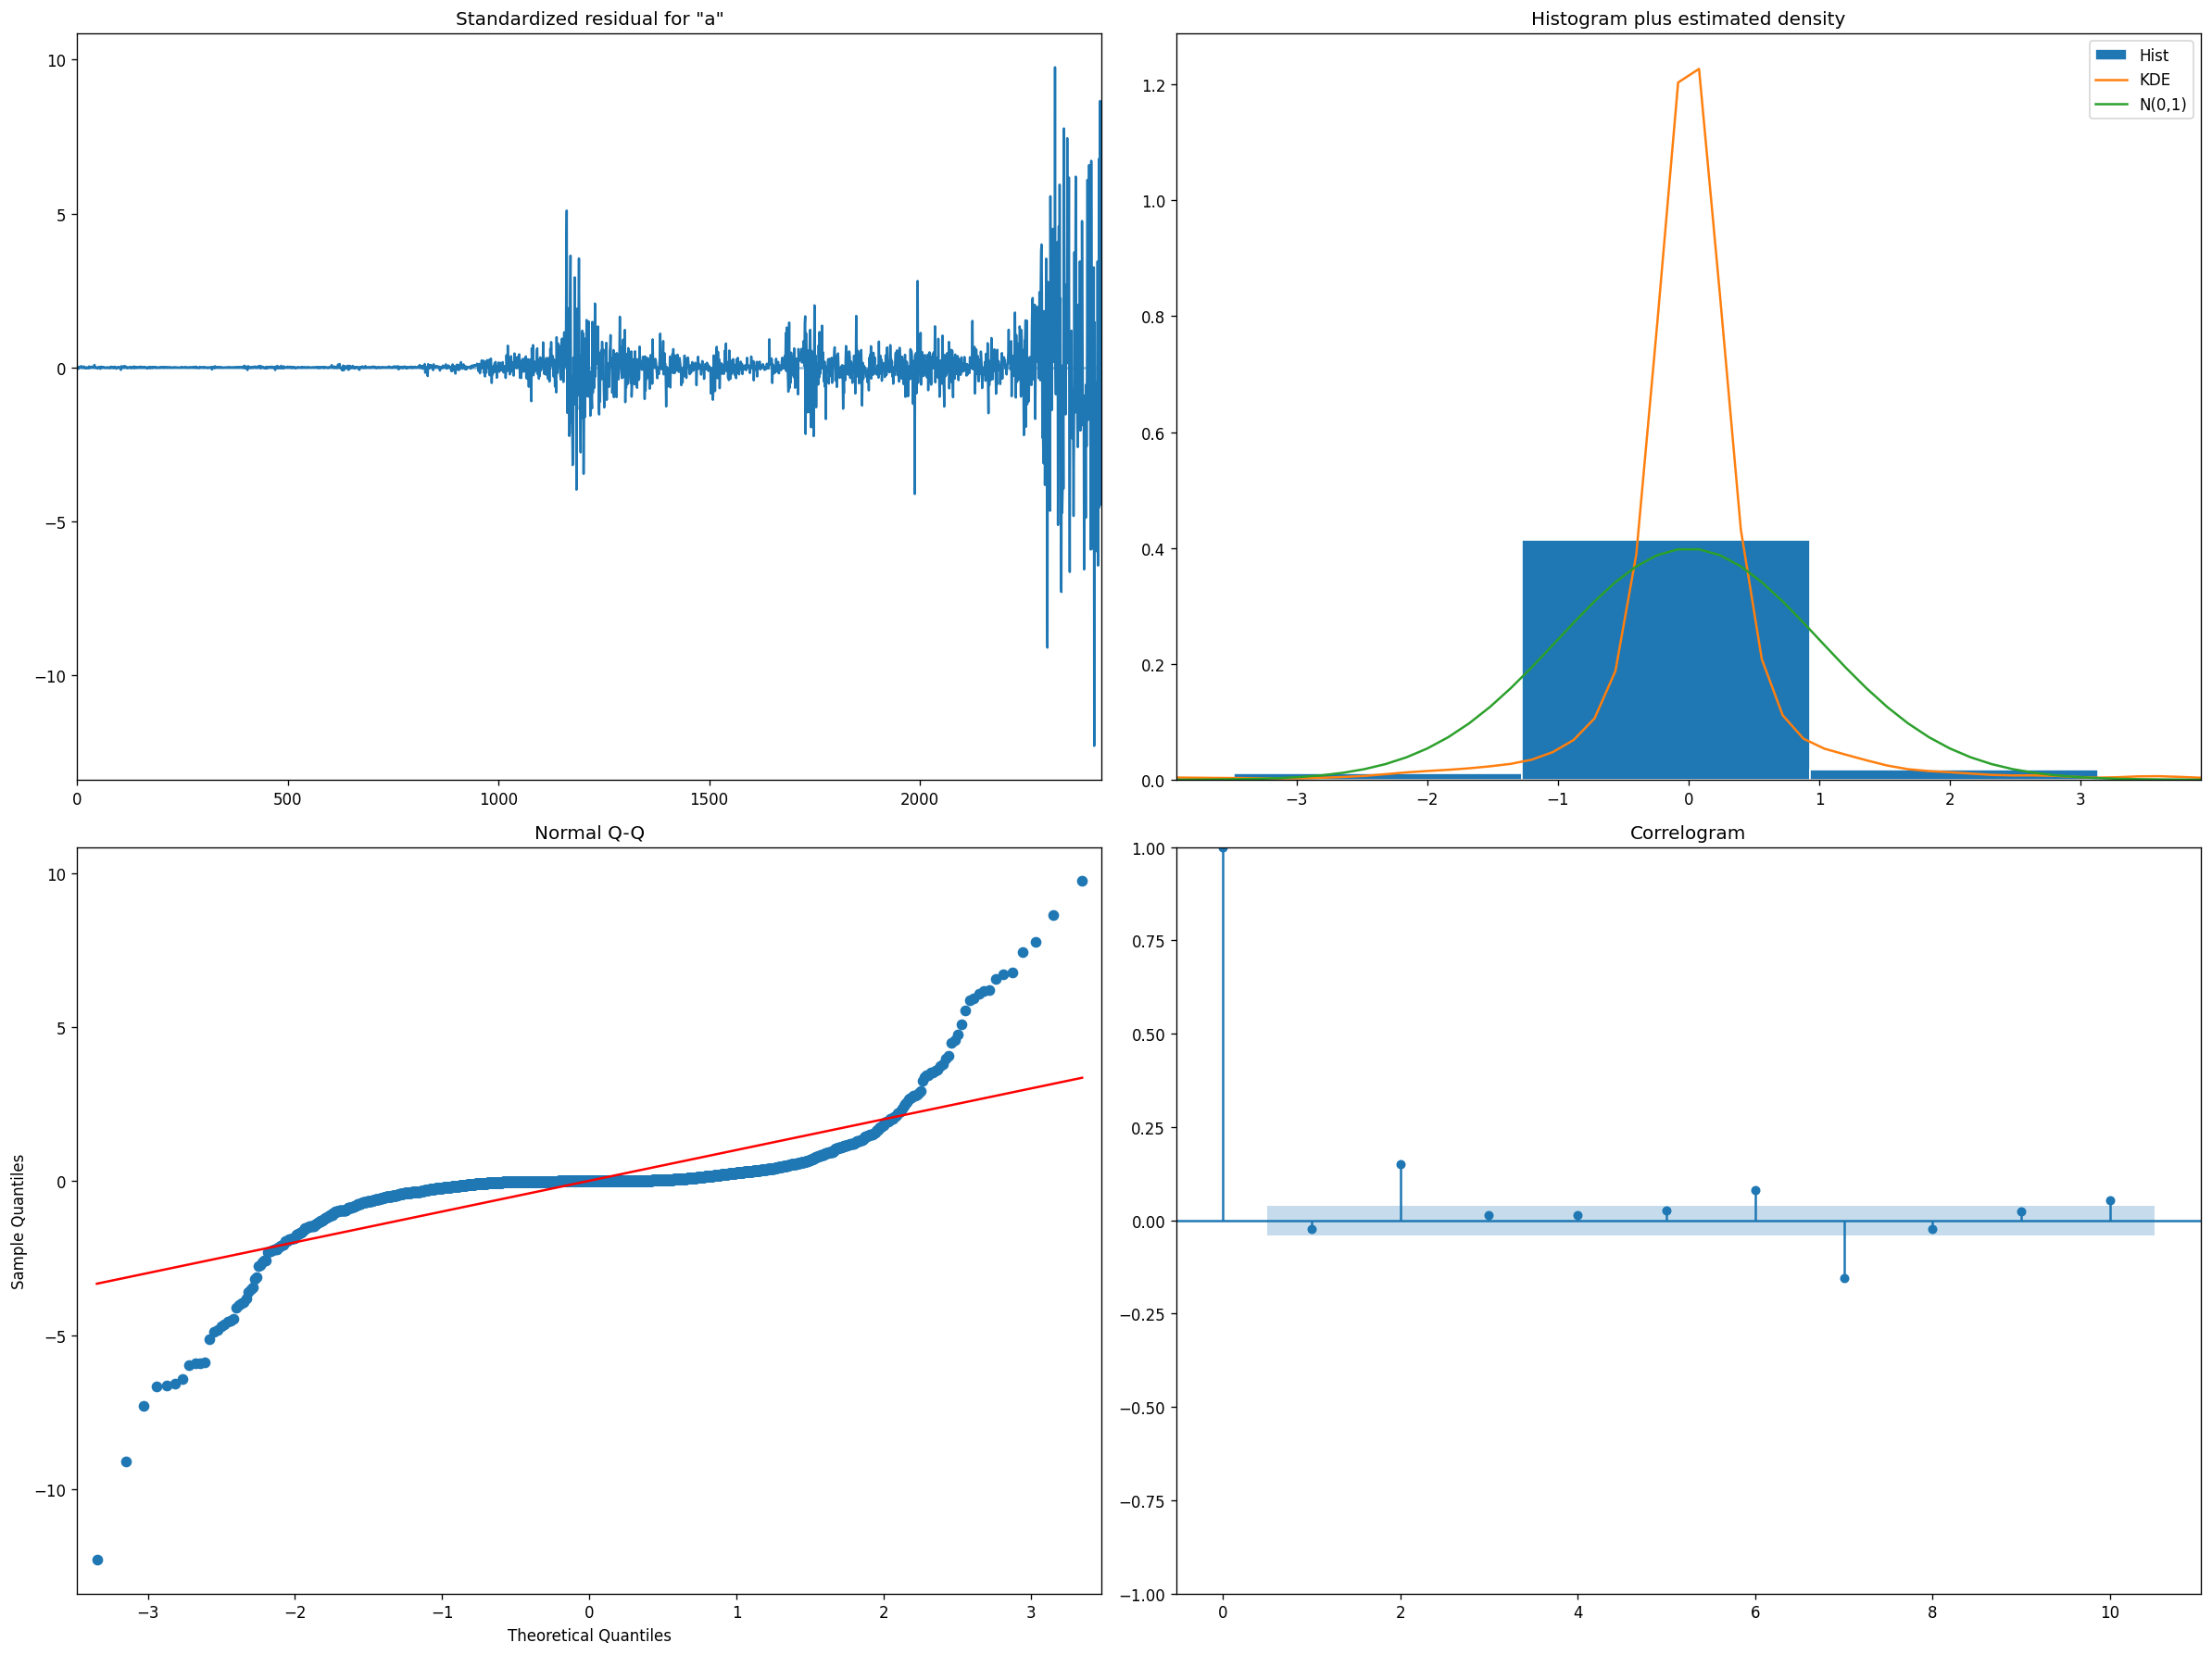

In [ ]:
# Plot common diagnostics
results.plot_diagnostics(figsize=(20, 15));
plt.tight_layout();


<Axes: xlabel='Date'>

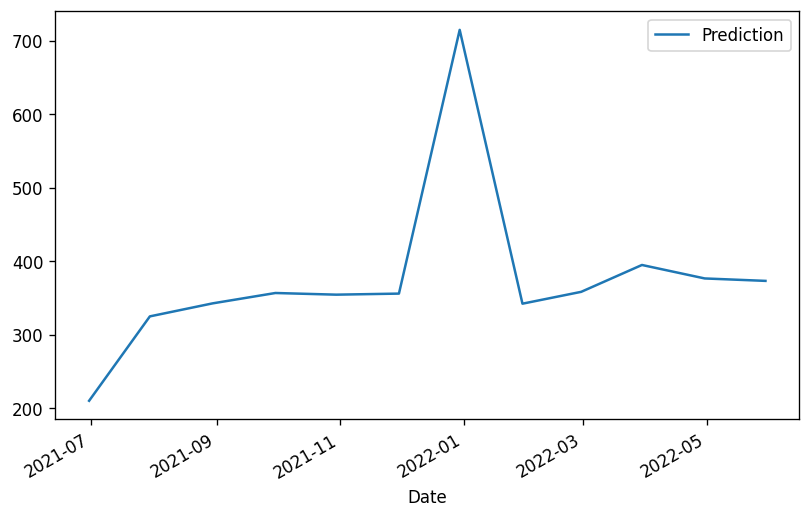

In [ ]:
# predict['forecast']=results.predict(start=1800,end=2500)
predict[['Prediction']].plot(figsize=(8,5))

In [ ]:
# future_dates_df['prediction']=predict['predicted_mean']

In [ ]:
frames = [ future_dates_df, predict]

result = pd.concat(frames, axis=1)


In [ ]:
result

,Date,prediction,Prediction
0,2021-06-30,NaN,NaN
1,2021-07-30,NaN,NaN
2,2021-08-30,NaN,NaN
3,2021-09-30,NaN,NaN
4,2021-10-30,NaN,NaN
5,2021-11-30,NaN,NaN
6,2021-12-30,NaN,NaN
7,2022-01-30,NaN,NaN
8,2022-02-28,NaN,NaN
9,2022-03-30,NaN,NaN


In [ ]:
predict=pd.DataFrame(index=results.predict(start=1,end=23))

In [ ]:
predict.reset_index(inplace=True)

In [ ]:
predict

,predicted_mean
0,210.262304
1,325.024167
2,342.721648
3,356.815106
4,354.553297
5,355.996512
6,714.591582
7,342.286593
8,358.395081
9,394.920740


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


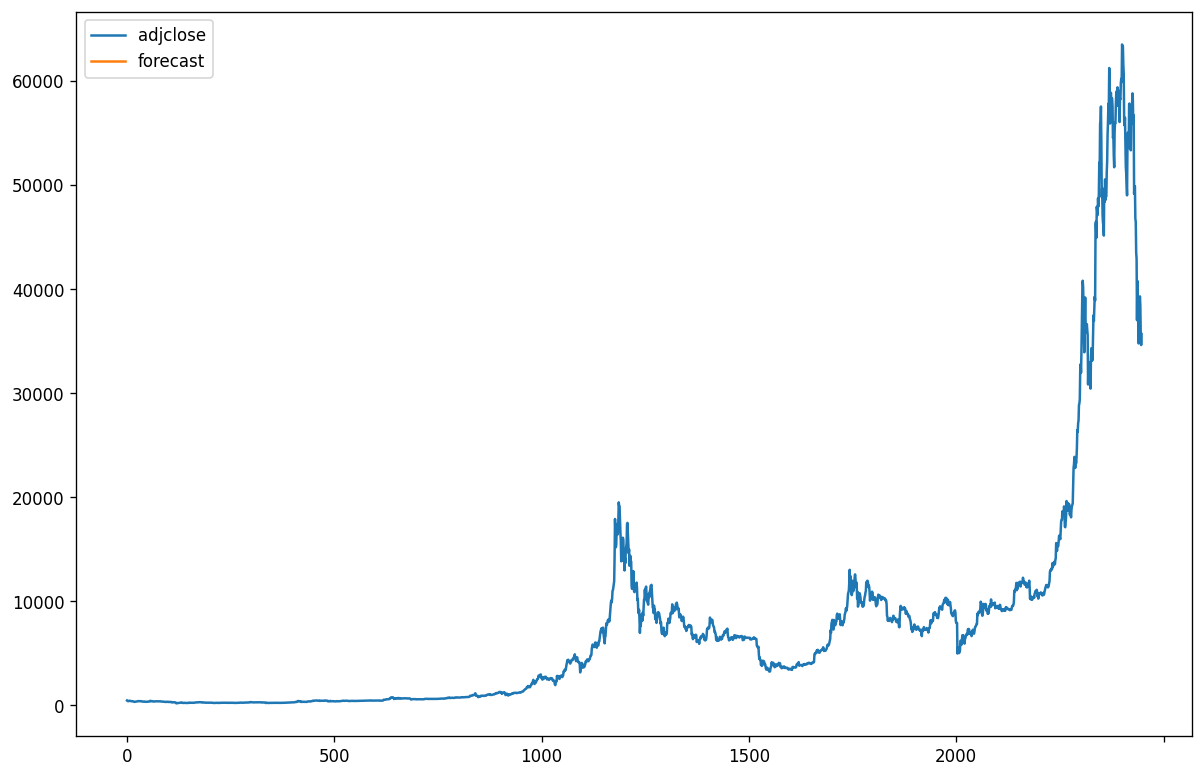

In [ ]:
future_df['forecast'] = results.predict(start = 2975, end = 2999, dynamic= True)  
future_df[['adjclose', 'forecast']].plot(figsize=(12, 8))